<a href="https://colab.research.google.com/github/francescodilda/MLPNS_FDilda/blob/main/KS_earthquake_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats

In [41]:
eqs = pd.read_csv("https://github.com/fedhere/MLPNS_FBianco/blob/main/statistics/KStest/earthquakes.csv?raw=true", sep=" ")

In [42]:
eqs.shape

(70798, 34)

In [43]:
eqs.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
eqs.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,...,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,...,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,...,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,...,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,...,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,...,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,...,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,...,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
eqs.columns

Index(['#YYY/MM/DD', 'HH:mm:SS.ss', 'ET', 'GT', 'MAG', 'Unnamed: 5', 'M',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'LAT', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'LON', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'DEPTH', 'Q', 'Unnamed: 25', 'EVID',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'NPH', 'NGRM'],
      dtype='object')

In [46]:
eqs.rename({"#YYY/MM/DD": "date", 
            "HH:mm:SS.ss": "time"}, axis=1, inplace=True)

In [47]:
eqs.head()

,date,time,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
eqs.time.dtype, eqs.date.dtype


(dtype('O'), dtype('O'))

In [49]:
pd.to_datetime("1984/01/01" + " " + "19:38:19.79")

Timestamp('1984-01-01 19:38:19.790000')

In [50]:
eqs.date.map(pd.to_datetime)

0       1984-01-01
1       1984-01-01
2       1984-01-01
3       1984-01-01
4       1984-01-01
           ...    
70793   2002-12-29
70794   2002-12-29
70795   2002-12-29
70796   2002-12-30
70797   2002-12-30
Name: date, Length: 70798, dtype: datetime64[ns]

In [51]:
for i in range(len(eqs)):
  if eqs.iloc[i]["time"].endswith("60.00"):
    print(eqs.iloc[i]["time"])
    print(eqs.iloc[i]["time"].replace("60.00", "59.99"))
    eqs.at[i, "time"] = eqs.iloc[i]["time"].replace("60.00", "59.99")
    print(eqs.iloc[i]["time"])


04:48:60.00
04:48:59.99
04:48:59.99
14:19:60.00
14:19:59.99
14:19:59.99
21:48:60.00
21:48:59.99
21:48:59.99
15:34:60.00
15:34:59.99
15:34:59.99
06:41:60.00
06:41:59.99
06:41:59.99


In [52]:
eqs['datetime'] = [eqs.iloc[i].date + " " + eqs.iloc[i].time for i in range(len(eqs))]
eqs["datetime"] = eqs["datetime"].map(pd.to_datetime)



In [53]:
eqs.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,...,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,...,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,...,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,...,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,...,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,...,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,...,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,...,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#delete
# first I create the timetamps pairs for the beginning and end of the valid periods. 
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
    
    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime. 
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

In [55]:
gooddates = ((eqs.datetime >= ss[0][0]) * (eqs.datetime <= ss[0][0]) + 
            (eqs.datetime >= ss[1][0]) * (eqs.datetime <= ss[1][0]) + 
            (eqs.datetime >= ss[2][0]) * (eqs.datetime <= ss[2][0]) + 
            (eqs.datetime >= ss[3][0]) * (eqs.datetime <= ss[3][0]) + 
            (eqs.datetime >= ss[4][0]) * (eqs.datetime <= ss[4][0]) + 
            (eqs.datetime >= ss[5][0]) * (eqs.datetime <= ss[5][0]) + 
            (eqs.datetime >= ss[6][0]) * (eqs.datetime <= ss[6][0]) + 
            (eqs.datetime >= ss[7][0]) * (eqs.datetime <= ss[7][0]) +
            (eqs.datetime >= ss[8][0]) * (eqs.datetime <= ss[9][0]) + 
            (eqs.datetime >= ss[10][0]) * (eqs.datetime <= ss[10][0])).values


In [56]:
gooddates

array([False, False, False, ..., False, False, False])

In [57]:
eqs.columns

Index(['date', 'time', 'ET', 'GT', 'MAG', 'Unnamed: 5', 'M', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'LAT', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'LON',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'DEPTH', 'Q', 'Unnamed: 25', 'EVID', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'NPH',
       'NGRM', 'datetime'],
      dtype='object')

In [58]:
eqGoodData = eqs[gooddates][['datetime', 'Unnamed: 5']]

In [59]:
eqGoodData.rename({'Unnamed: 5' : 'mag'}, axis = 1, inplace=True)

In [60]:
eqGoodData = eqGoodData[eqGoodData['mag'] >= 2]

In [61]:
eqGoodData['gaps'] = eqGoodData['datetime'].diff().values.astype(float)

In [62]:
eqGoodData

,datetime,mag,gaps
65937,2000-11-25 00:05:20.710,2.05,-9.223372e+18
65938,2000-11-25 18:01:03.180,3.12,6.454247e+13
65939,2000-11-26 13:24:28.990,2.05,6.980581e+13
65940,2000-11-26 13:51:42.460,2.02,1.633470e+12
65941,2000-11-26 15:34:41.230,2.09,6.178770e+12
...,...,...,...
68161,2001-08-07 15:18:22.930,2.46,3.419640e+12
68162,2001-08-07 16:52:54.250,3.47,5.671320e+12
68163,2001-08-07 18:12:39.310,2.47,4.785060e+12
68164,2001-08-07 19:06:14.700,2.76,3.215390e+12


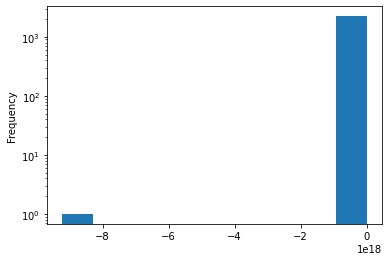

In [63]:
eqGoodData["gaps"].plot(kind = "hist", logy = True);

In [64]:
eqGoodData.describe()

,mag,gaps
count,2229.000000,2.229000e+03
mean,2.399946,-4.127981e+15
std,0.385603,1.953598e+17
min,2.000000,-9.223372e+18
25%,2.120000,8.347000e+11
50%,2.290000,4.413070e+12
75%,2.570000,1.300808e+13
max,5.170000,1.274516e+14


In [65]:
eqGoodData = eqGoodData[1:]     # gaps della prima colonna non ha senso, per come funziona diff

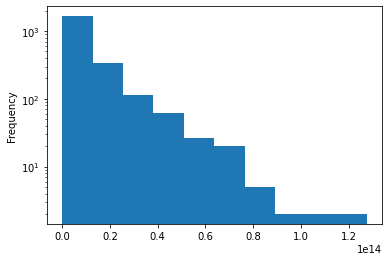

In [66]:
eqGoodData["gaps"].plot(kind = "hist", logy = True);

In [67]:
monthgap = 2.628e+15 # month in ns
eqGoodData = eqGoodData[eqGoodData.gaps < monthgap]

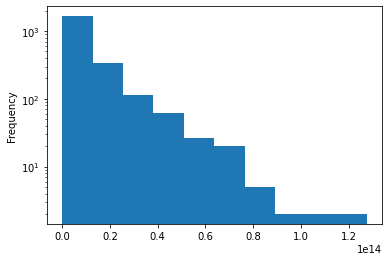

In [68]:
eqGoodData["gaps"].plot(kind = "hist", logy = True);

In [69]:
alpha = 0.003 # 3 sigma

In [71]:
import numpy as np
t1 = eqGoodData['gaps'][eqGoodData.mag >= 2]
t2 = eqGoodData['gaps'][eqGoodData.mag >= 2.5]
sp.stats.ks_2samp(np.log10(t1), np.log10(t2))

KstestResult(statistic=0.03560484120596793, pvalue=0.49852100846443753, statistic_location=11.299114883600536, statistic_sign=-1)

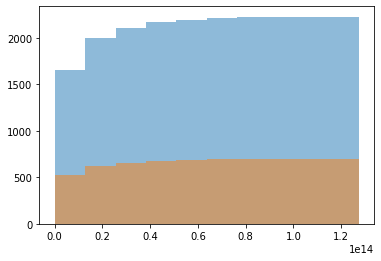

In [74]:
pl.hist(t1, cumulative=True, alpha = 0.5);
pl.hist(t2, cumulative=True, alpha = 0.5);

original data size: 2227
removing time gaps that are too long. new size: 2227
mean unrescaled time gap 9895601728783.117
removing time gaps too small, first pass: new size 2065
mean unrescaled time gap 1.078
removing time gaps too small, second pass: new size 2055
mean unrescaled time gap 1.005
  
original data size: 695
removing time gaps that are too long. new size: 695
mean unrescaled time gap 31708640359712.230
removing time gaps too small, first pass: new size 622
mean unrescaled time gap 1.117
removing time gaps too small, second pass: new size 617
mean unrescaled time gap 1.008
  
original data size: 170
removing time gaps that are too long. new size: 170
mean unrescaled time gap 129575947470588.234
removing time gaps too small, first pass: new size 151
mean unrescaled time gap 1.126
removing time gaps too small, second pass: new size 150
mean unrescaled time gap 1.007
  
original data size: 41
removing time gaps that are too long. new size: 41
mean unrescaled time gap 517172833

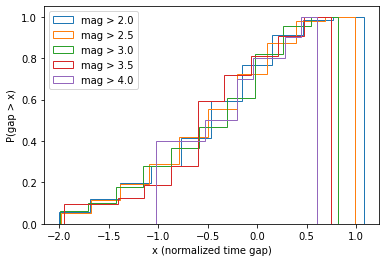

In [75]:
#delete
def rescale(df, threshold=0.01):
    times = [] # container for all arrays of rescaled time gaps (for 5 magnitude thresholds)
    hss = [] # container for heights of histograms
    binss = [] # container for bins of histograms

    for m in [2, 2.5, 3, 3.5, 4]:
        #select magnitude and convert to floating point numbers
        tmp = df['datetime'][df.mag >= m].diff().values[1:].astype(float)
        print("original data size:", len(tmp))
    
        tmp = tmp[tmp < 3e16] #cut outliers (optional)
        print("removing time gaps that are too long. new size:", len(tmp))
        #iterate cuts for ...
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
        tmp = tmp[tmp / rs >= threshold] / rs
        print("removing time gaps too small, first pass: new size", len(tmp))
   
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
        tmp = tmp[tmp / rs >= threshold] / rs
        print("removing time gaps too small, second pass: new size", len(tmp))
 
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
    
        tmp = tmp / rs
        print("  ")
    
        times.append(np.log10(tmp))
    
        #calculate the histogram of the last array of times (the one that you just calculated)
        hs, bins, patch= pl.hist(times[-1], 
                             cumulative=True, density=1, histtype="step", label="mag > %.1f"%m)
        hss.append(hs)
        binss.append(bins)

    pl.legend(fontsize=10)
    pl.xlabel("x (normalized time gap)")
    pl.ylabel("P(gap > x)")
    return binss, hss, times
  
binss, hss, times = rescale(eqGoodData, threshold=0.01)

In [80]:
mags = [2, 2.5, 3, 3.5, 4];
for i in range(5):
  for j in range(i + 1, 5):
    print(mags[i], mags[j], "{:.3f}".format(sp.stats.ks_2samp(times[i], times[j])[1]))

2 2.5 0.841
2 3 0.542
2 3.5 0.649
2 4 0.688
2.5 3 0.718
2.5 3.5 0.654
2.5 4 0.709
3 3.5 0.340
3 4 0.655
3.5 4 0.810


scipy.stats._stats_py.KstestResult